# Цифровая обработка изображений

In [16]:
import sys
sys.path.append('../')
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

In [17]:
# Изменим стандартный размер графиков matplotlib
WIDTH_SIZE = 15
HEIGHT_SIZE = 10
plt.rcParams["figure.figsize"] = [WIDTH_SIZE, HEIGHT_SIZE]

### Сопоставление шаблонов

Сопоставление шаблонов — это метод поиска фрагмента изображения (шаблона) и его местоположения в более крупном изображении. Работа метода основана на перемещении окна (ROI) по входному изображению (как в свертке) и вычислении метрики близости фрагмента изображения, ограниченного окном с шаблоном. Результатом этой работы является новое изображение, где каждый пиксель имеет значение метрики близости фрагмента изображения в текущей окрестности с шаблоном. В OpenCV для этого используется функция cv.matchTemplate().
Когда есть выходное изображение с мерой близости можно использовать функцию cv.minMaxLoc() чтобы найти координаты пикселя с максимальным (минимальным) значением меры близости.
В OpenCV реализовано несколько методов [сравнения](https://docs.opencv.org/3.4/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d). От этого зависит максимальное или минимальное значение необходимо искать.

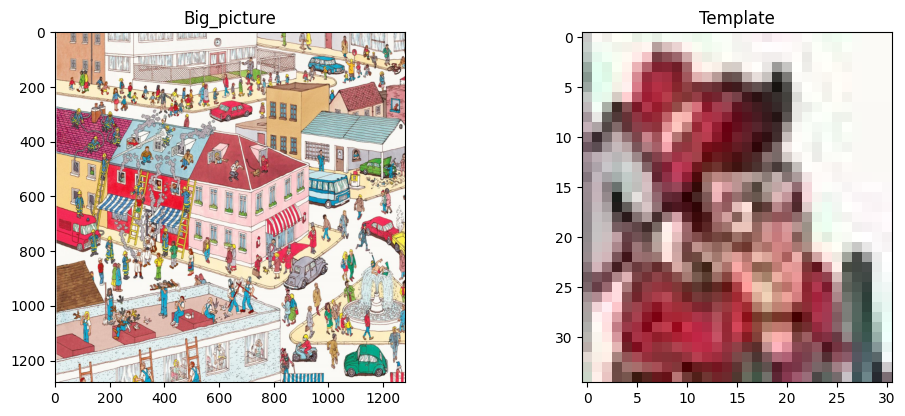

In [19]:
image = cv.imread('images/city.jpeg') 
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
template = cv.imread('images/clown.png')
template = cv.cvtColor(template, cv.COLOR_BGR2RGB)

gs = plt.GridSpec(2, 2)

plt.figure(figsize=(12, 10))
plt.subplot(gs[0])
plt.title("Big_picture")
plt.imshow(image)
plt.subplot(gs[1])
plt.title("Template")
plt.imshow(template)

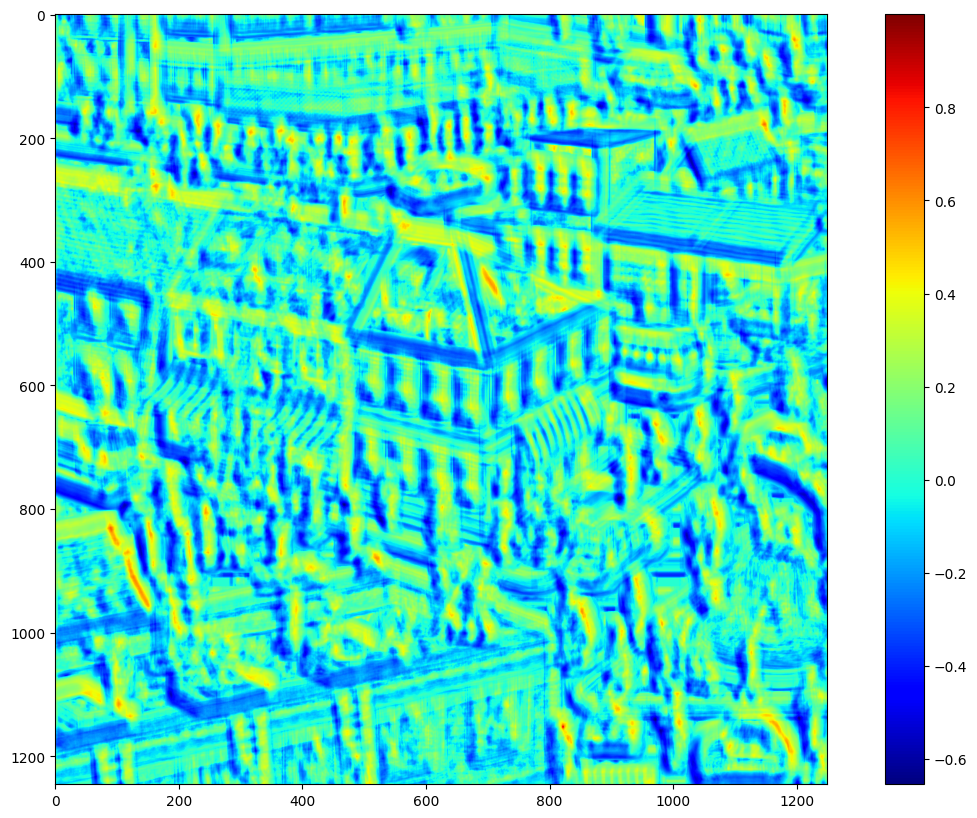

In [20]:
# Считаем размеры шаблона
w, h = template.shape[:-1] 
 
#Переводим в черно-белый формат
gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
gray_tmp = cv.cvtColor(template, cv.COLOR_RGB2GRAY)

result = cv.matchTemplate(gray_img, gray_tmp, cv.TM_CCOEFF_NORMED)
plt.figure()
plt.imshow(result, cmap='jet')
plt.colorbar()

1. Определяем порог для выделения области локализации шаблона на изобажении
Порог зависит от метрики, т.к. значения различных метрик могут различаться
на порядки. Кроме по своей сути некоторые метрики измеряют "похожесть" 
и имеют большие значения для похожих изображений, а другие измеряют "отличие",
и ноборот, большие значения появляются для различающихся изображении

2. Определяем точки изображения в которых метрика превышает порог
Эти точки - центры локализации шаблона
Знак сравнения для метрик, измеряющих "отличия" необходимо заменить на противоположный

(array([1153]), array([821]))


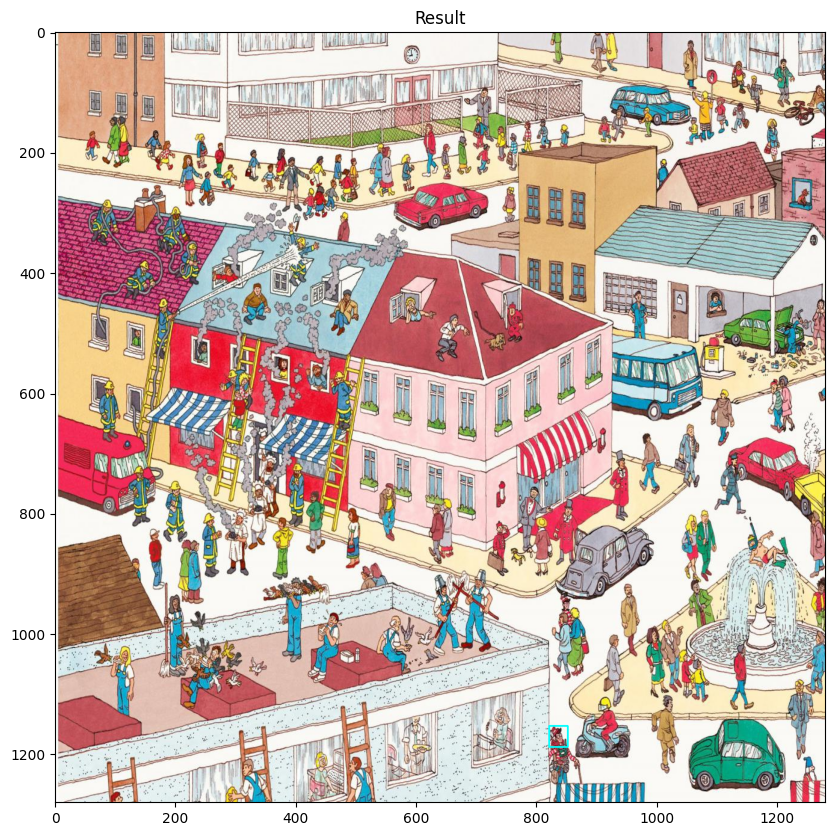

In [21]:
threshold = 0.9
loc = np.where(result >= threshold) 
print(loc)
# Вокруг выделенных максимумов обводим прямоугольники с размерами шаблона
plot_img = image.copy()
for pt in zip(*loc[::-1]):
    cv.rectangle(plot_img, pt,(pt[0] + h, pt[1] + w),(0, 255, 255), 2)  

# Отображаем результат на графике
plt.figure(figsize=(15, 10))
plt.title("Result")
plt.imshow(plot_img)